In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure

In [16]:
def visualize_prediction(first_f, last_f, no_features, name_time_column, dataframe, title, line=False):
    fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    plt.subplots_adjust(hspace=0.2, wspace=0.4)
    for i in range(first_f,last_f):
        sns.lineplot(data=dataframe, x=name_time_column, y=columns[i], ax=ax[i-first_f], label="target")
        sns.lineplot(data=dataframe, x=name_time_column, y=columns[i+no_features], ax=ax[i-first_f], label="predicted")
        if line:
            ax[i-first_f].axvline(1536, 0,2, color="r", linestyle ="--", linewidth=3, label="train-validation")
        #plt.text(1570, 2, 'validation data', fontsize=12)
        #plt.text(1300, 2, 'training data', fontsize=12)
        ax[i-first_f].set(xlabel='time', ylabel='value')
        ax[i-first_f].set(title=columns[i])
    fig.suptitle(title)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [6]:
def smooth_data(df, rate):
    for column in df.columns:
        smoothed_data = []
        for i,value in enumerate(df.loc[:,column]):
            if i==0:
                smoothed_data.append(value)
            else:
                x = rate  * value + (1 - rate) * smoothed_data[-1]
                smoothed_data.append(x)
        df.loc[:,column]=smoothed_data
    return df

# Visualisation of Prediction - New Machine
## Sensor Value Prediction

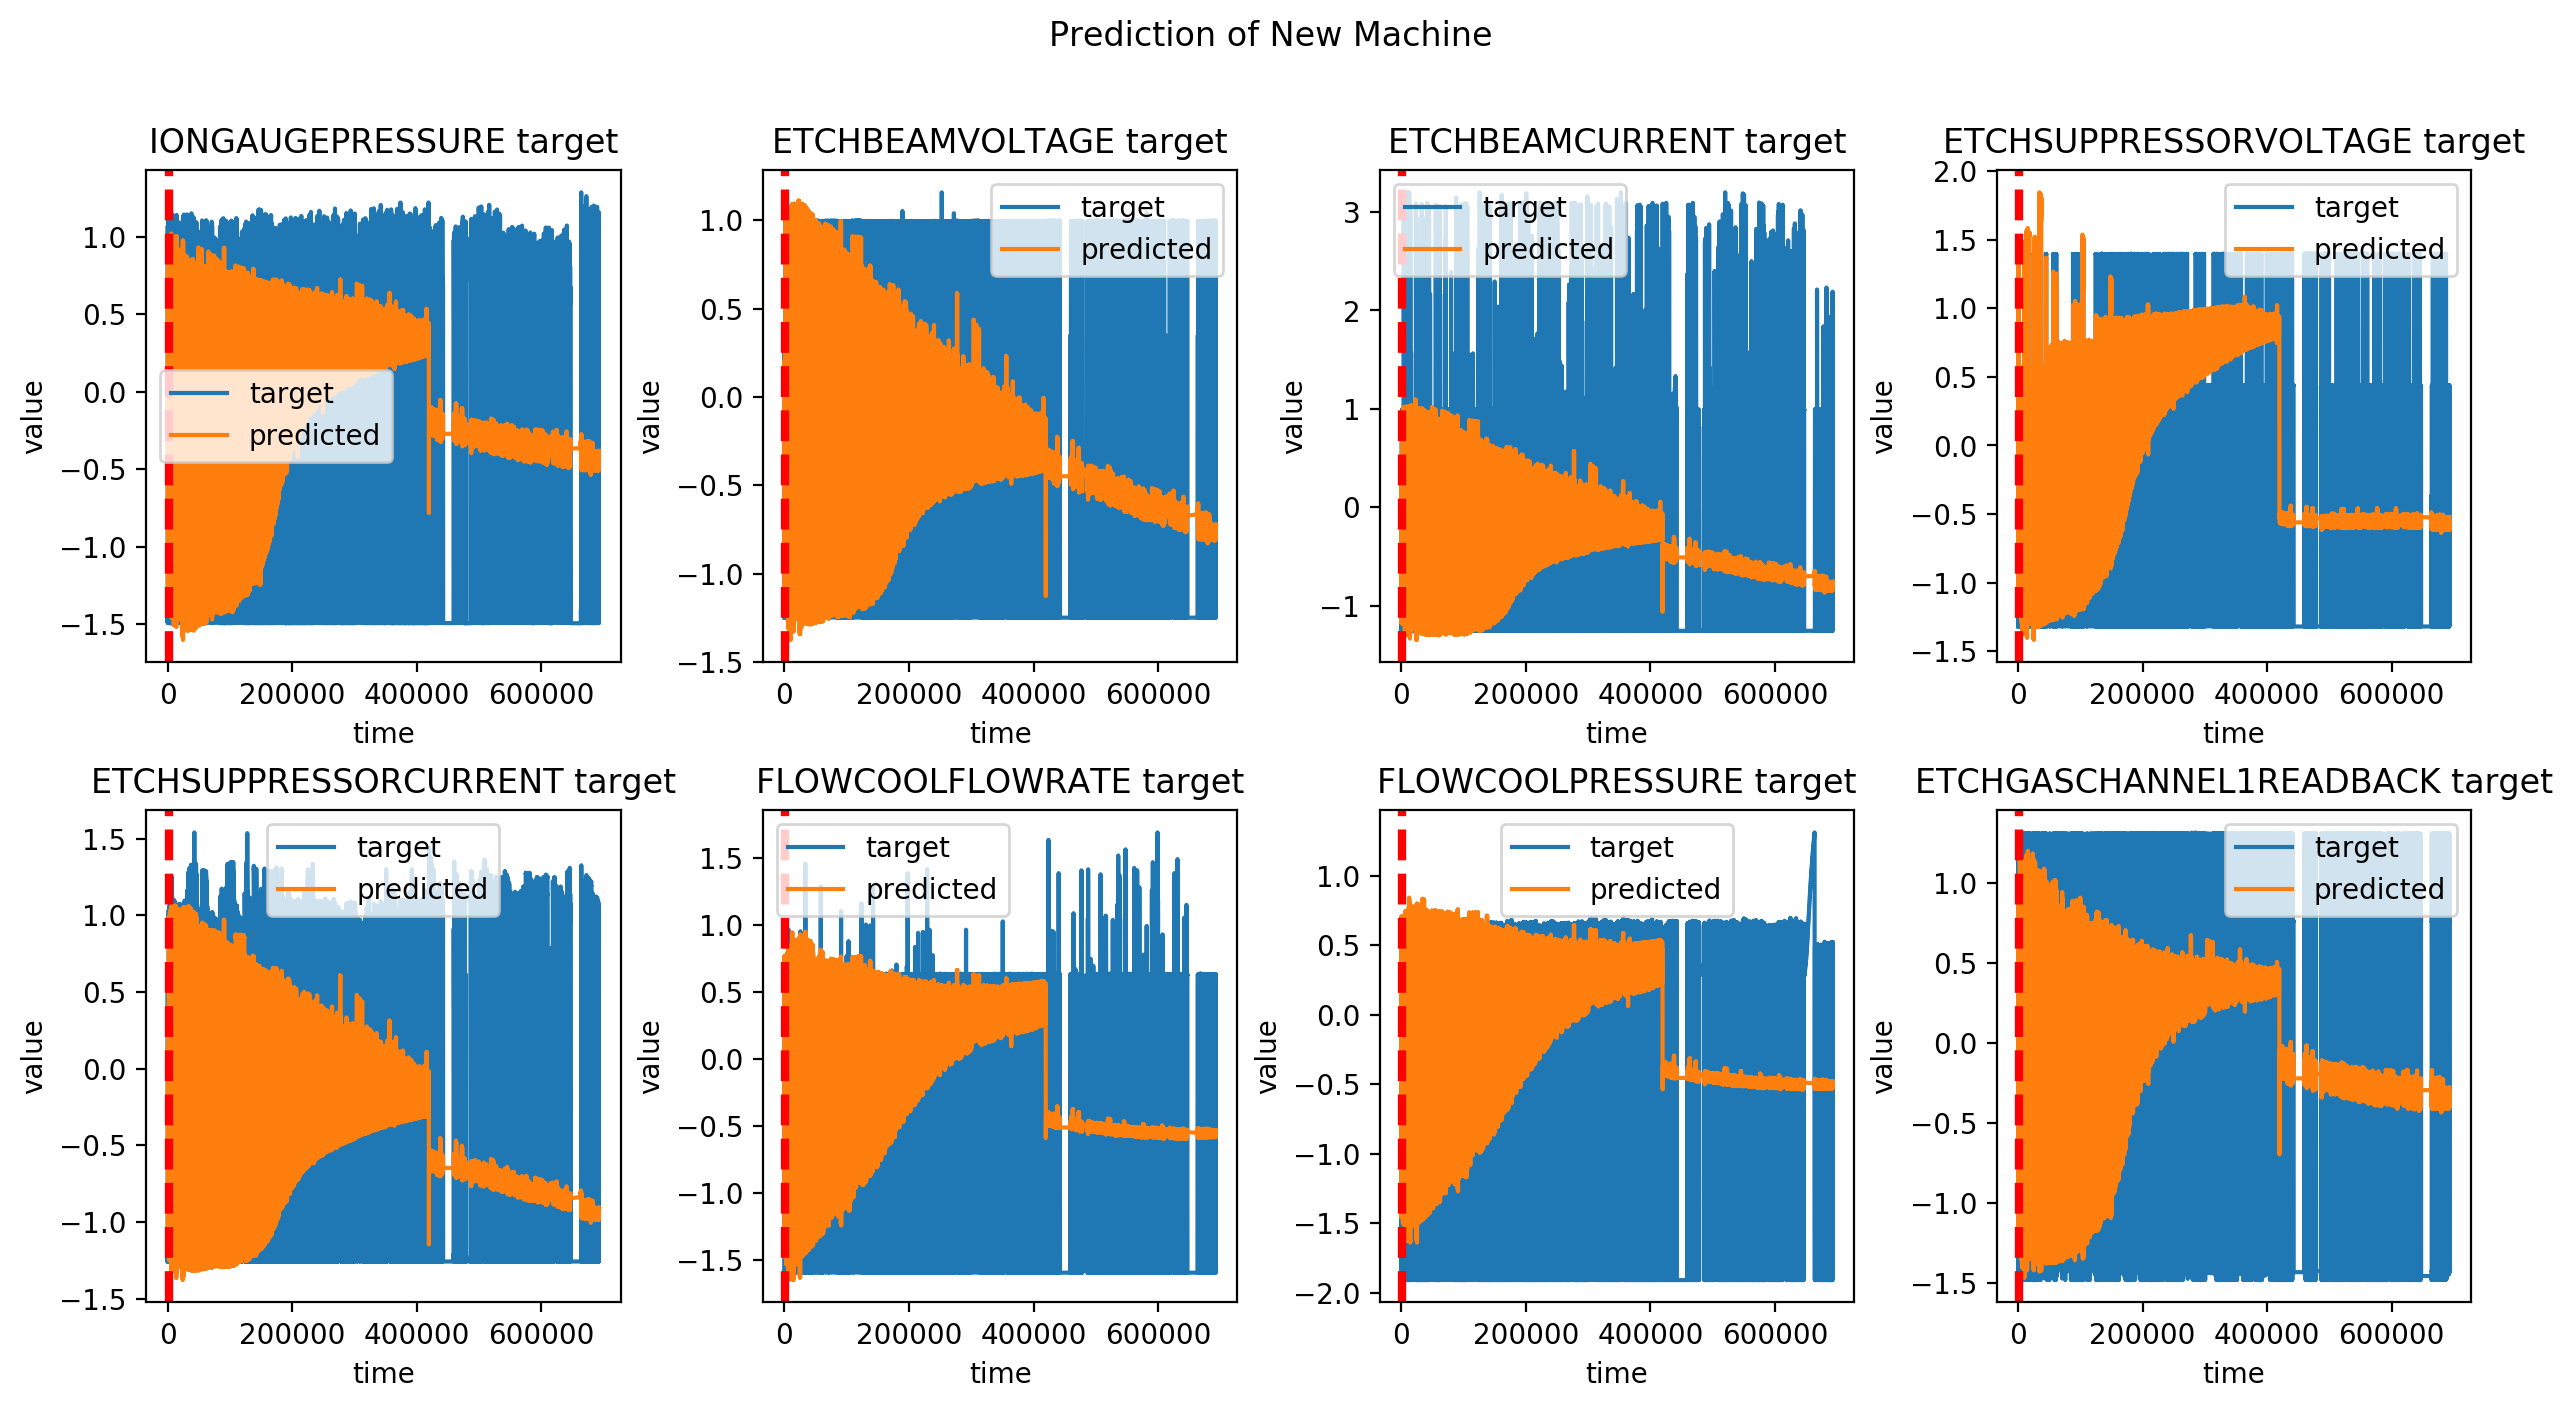

In [9]:
phm_data = pd.read_csv("../files/prediction/phm_data.csv", sep=";")
visualize_prediction(first_f=1, 
                     last_f=9, 
                     no_features=21, 
                     name_time_column="up time", 
                     dataframe=data_new_blade, 
                     title="Prediction of New Machine", 
                     line=False
                    )
plt.show()

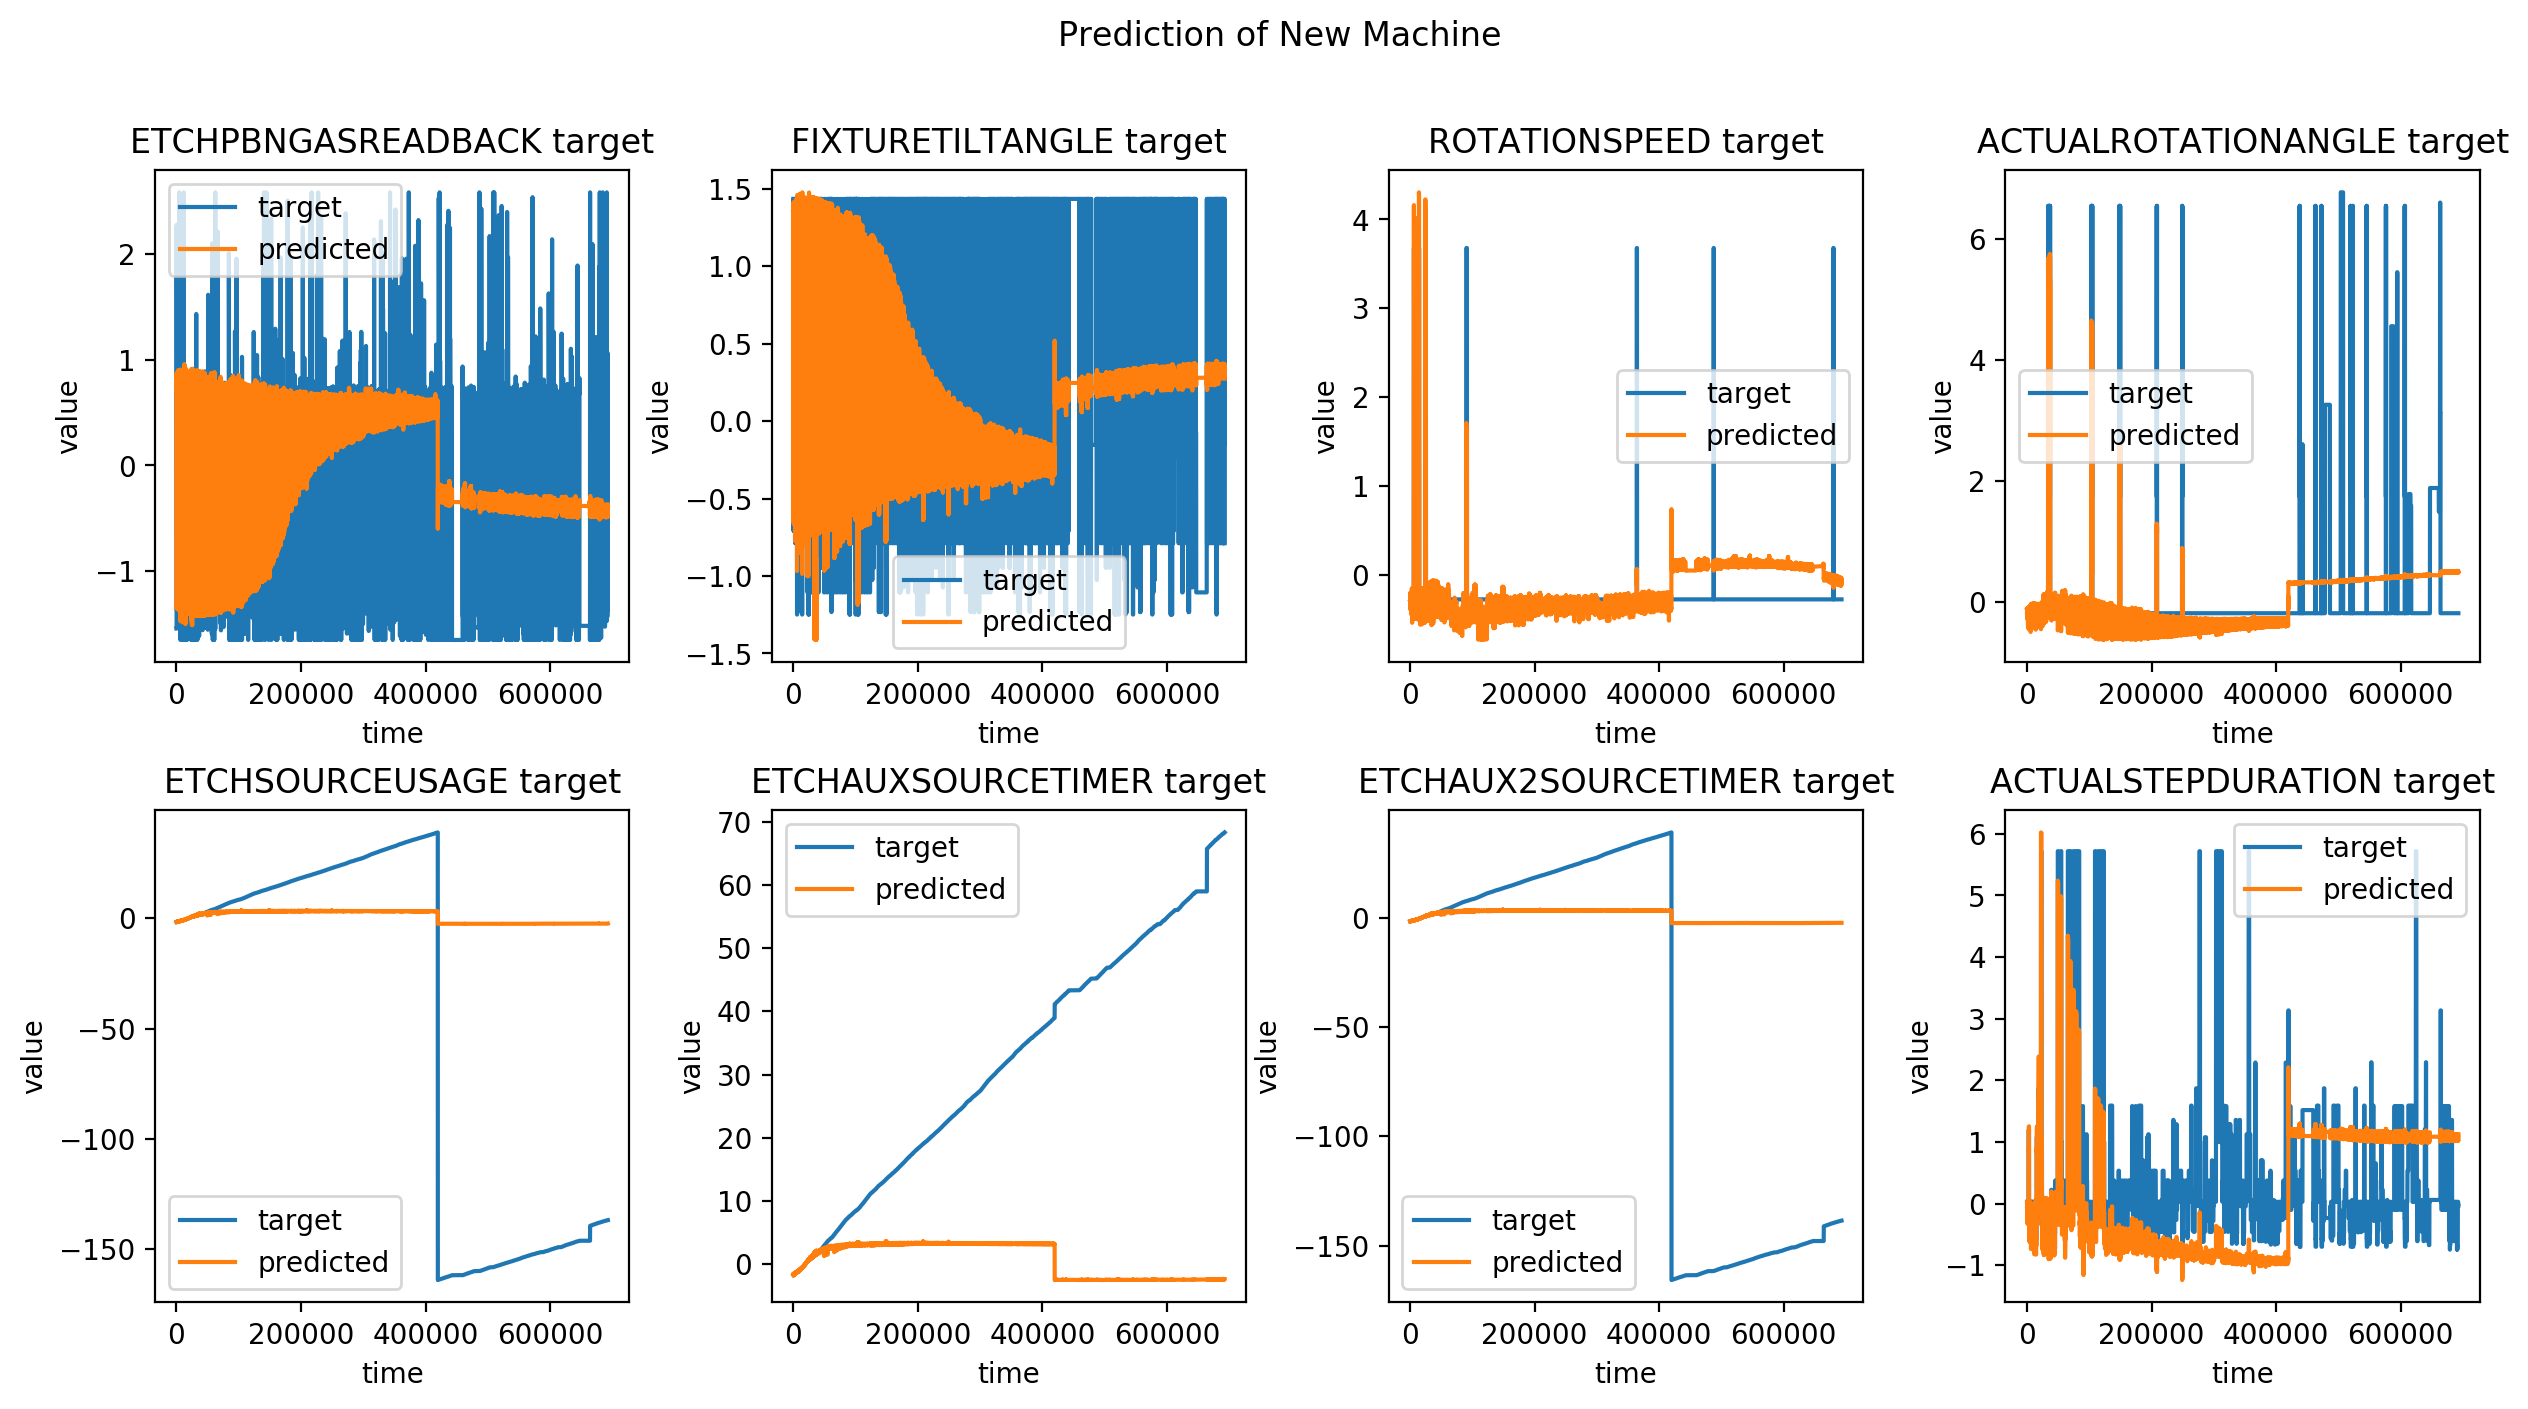

In [17]:
phm_data = pd.read_csv("../files/prediction/phm_data.csv", sep=";")
visualize_prediction(first_f=9, 
                     last_f=17, 
                     no_features=21, 
                     name_time_column="up time", 
                     dataframe=data_new_blade, 
                     title="Prediction of New Machine", 
                     line=False
                    )
plt.show()

### Prediction loss

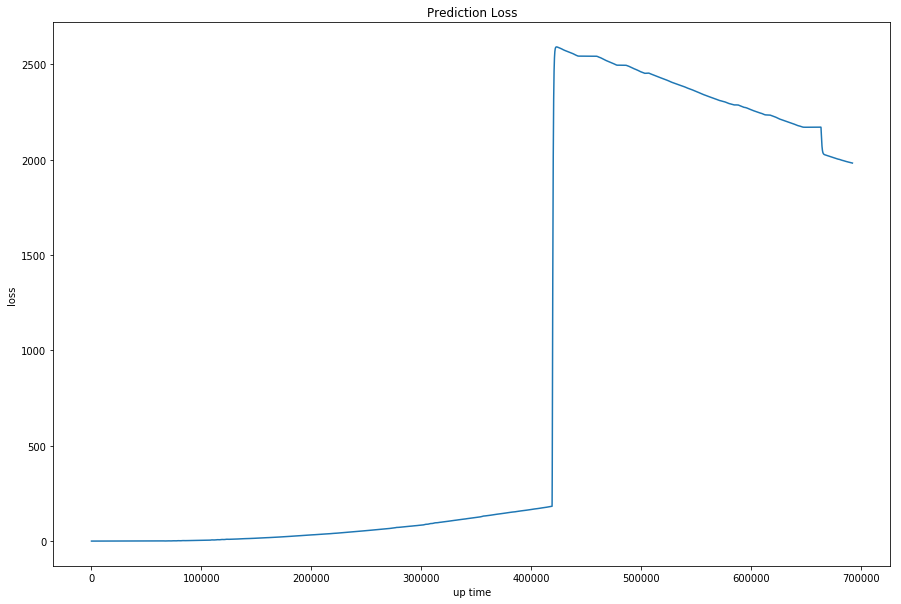

In [14]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=phm_data, x="up time", y=columns[43])
axes.set_title("Prediction Loss")
plt.show()

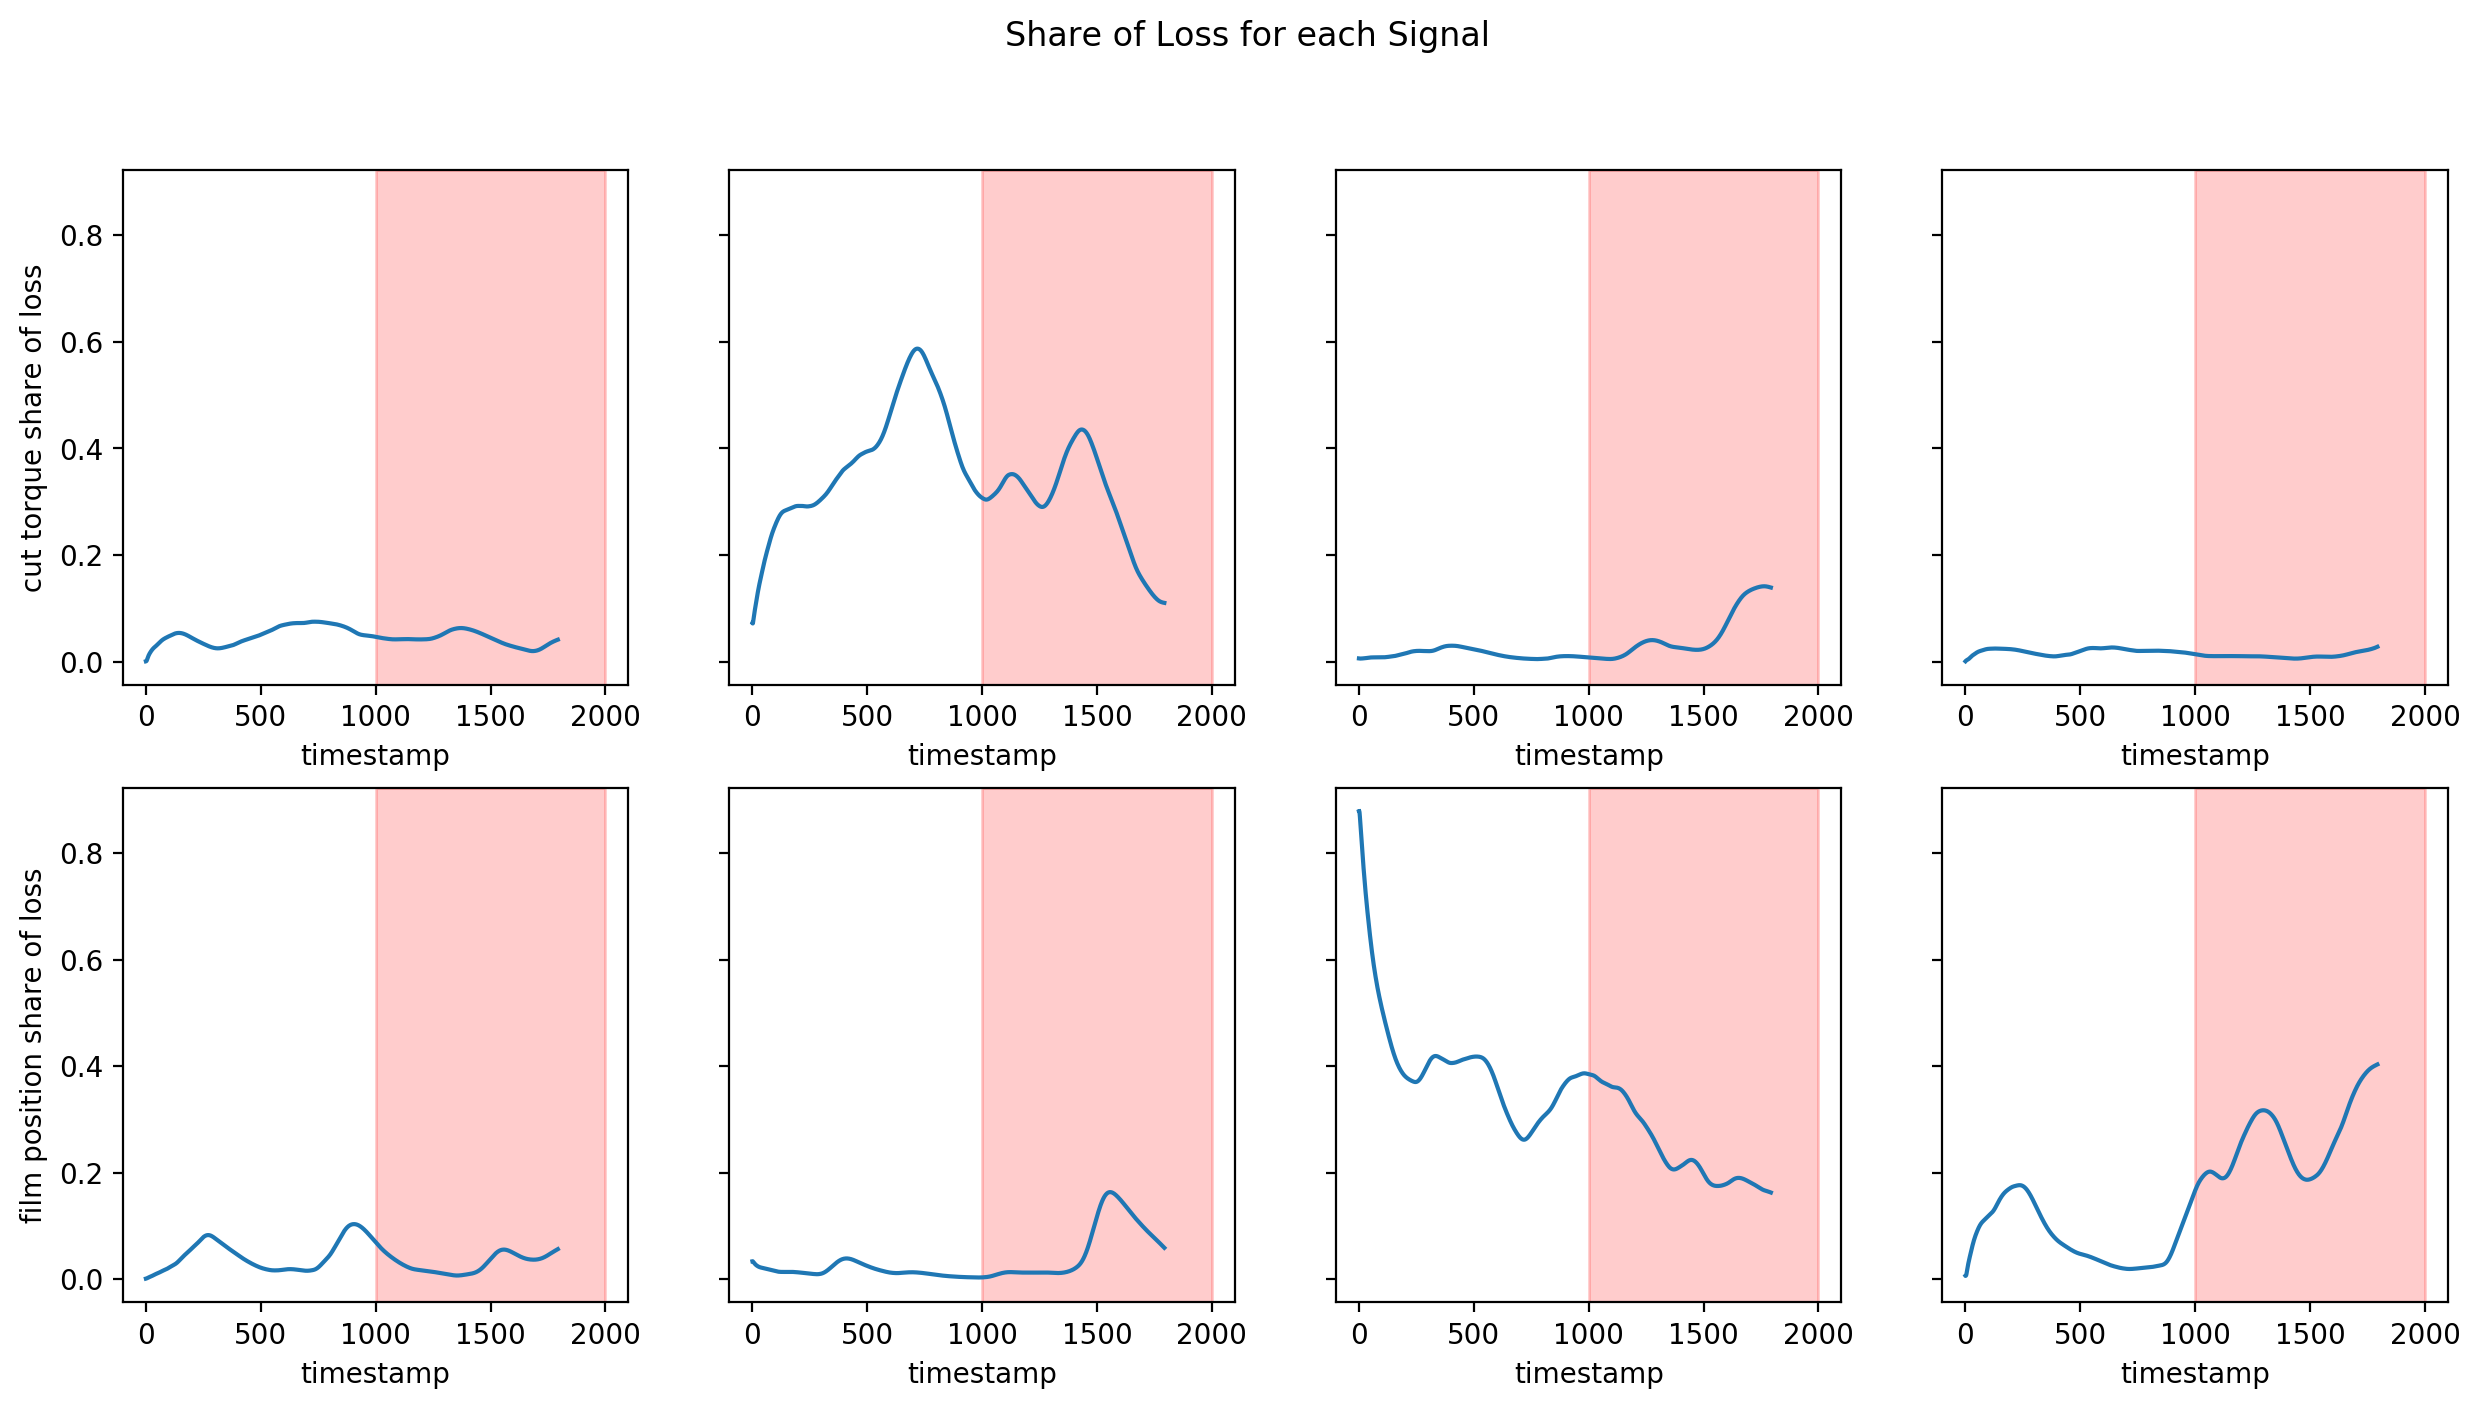

In [24]:
data_smoothed_loss_shares = smooth_data(data_degradation, 0.05)
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200, sharey=True)
ax = axes.ravel()
columns = data_smoothed_loss_shares.columns
for i in range(18,26):
    sns.lineplot(data=phm_data, x="up time", y=columns[i], ax=ax[i-18])
    ax[i-18].axvspan(1000, 2000, alpha=0.2, color='red')
fig.suptitle("Share of Loss for each Signal")
plt.show()